<a href="https://colab.research.google.com/github/SparkCheck/Sparkcheckcompliance/blob/main/SparkGel_Resonance_Simulation_CLEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resonance Efficiency: 16.0% (8 of 50 dots matched)


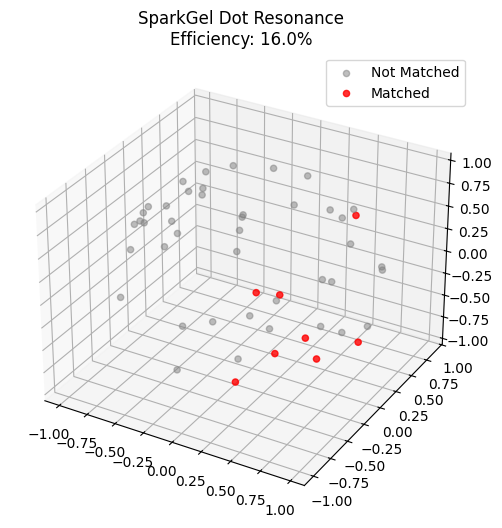

In [ ]:
# SparkGel Resonance Simulation (Basic Version)

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 50  # number of quantum dots
f = 6.0  # tuning frequency (THz)
tol = 0.2  # matching tolerance (THz)

# Random dots and resonances
np.random.seed(1234)
dots = np.random.normal(size=(n, 3))
dots /= np.linalg.norm(dots, axis=1)[:, None]  # normalize to unit sphere
resonances = np.random.uniform(5, 7, n)

# Match dots
matched = np.abs(resonances - f) < tol
efficiency = matched.sum() / n

# Print results
print(f"Resonance Efficiency: {efficiency:.1%} ({matched.sum()} of {n} dots matched)")

# Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"SparkGel Dot Resonance\nEfficiency: {efficiency:.1%}")
ax.scatter(dots[~matched, 0], dots[~matched, 1], dots[~matched, 2], color='gray', alpha=0.5, label="Not Matched")
ax.scatter(dots[matched, 0], dots[matched, 1], dots[matched, 2], color='red', alpha=0.8, label="Matched")
ax.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# Data
n = 50
np.random.seed(1234)
dots = np.random.normal(size=(n, 3))
dots /= np.linalg.norm(dots, axis=1)[:, None]
resonances = np.random.uniform(5, 7, n)

# UI sliders
f_slider = .FloatSlider(value=6.0, min=5.0, max=7.0, step=0.05, description='Frequency (THz):')
tol_slider = .FloatSlider(value=0.2, min=0.05, max=0.5, step=0.01, description='Tolerance (THz):')

# Plot update function
def update_plot(f, tol):
    matched = np.abs(resonances - f) < tol
    efficiency = matched.sum() / n * 100

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dots[~matched, 0], dots[~matched, 1], dots[~matched, 2], color='gray', alpha=0.5, label='Not Matched')
    ax.scatter(dots[matched, 0], dots[matched, 1], dots[matched, 2], color='red', alpha=0.8, label='Matched')
    ax.set_title(f"Resonance Efficiency: {efficiency:.1f}%")
    ax.legend()
    plt.show()

# Display interactive controls
widgets.interactive(update_plot, f=f_slider, tol=tol_slider)

interactive(children=(FloatSlider(value=6.0, description='Frequency (THz):', max=7.0, min=5.0, step=0.05), Flo…

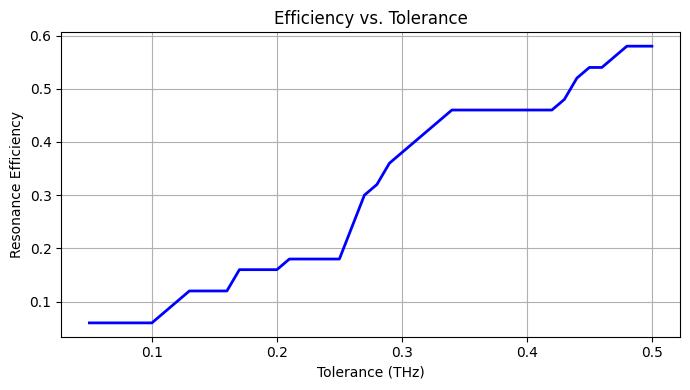

In [ ]:
# Efficiency calculation function
def efficiency(tol):
    matched = np.abs(resonances - 6.0) < tol  # fixed tuning frequency at 6.0 THz
    return matched.sum() / n

# Sweep across tolerance values
tolerance_values = np.arange(0.05, 0.51, 0.01)
efficiency_values = [efficiency(tol) for tol in tolerance_values]

# Plot
plt.figure(figsize=(7, 4))
plt.plot(tolerance_values, efficiency_values, color='blue', linewidth=2)
plt.title("Efficiency vs. Tolerance")
plt.xlabel("Tolerance (THz)")
plt.ylabel("Resonance Efficiency")
plt.grid(True)
plt.tight_layout()
plt.show()

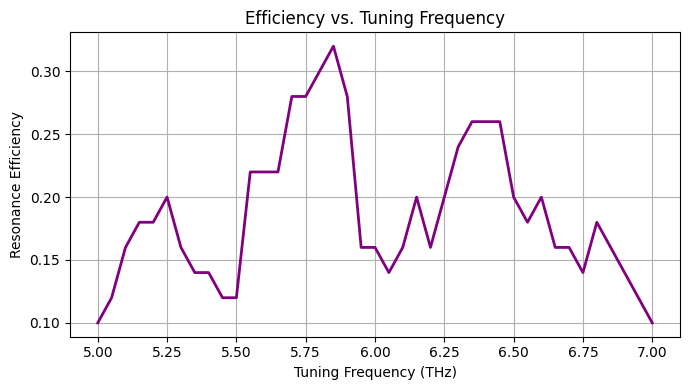

In [ ]:
# Efficiency as a function of tuning frequency
def efficiency(freq):
    matched = np.abs(resonances - freq) < 0.2  # fixed tolerance at 0.2 THz
    return matched.sum() / n

# Frequency range sweep
frequency_values = np.arange(5.0, 7.05, 0.05)
efficiency_values = [efficiency(freq) for freq in frequency_values]

# Plot
plt.figure(figsize=(7, 4))
plt.plot(frequency_values, efficiency_values, color='purple', linewidth=2)
plt.title("Efficiency vs. Tuning Frequency")
plt.xlabel("Tuning Frequency (THz)")
plt.ylabel("Resonance Efficiency")
plt.grid(True)
plt.tight_layout()
plt.show()

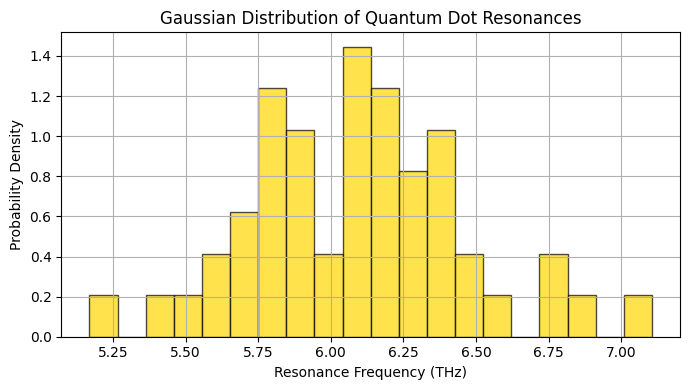

In [ ]:
# Replace uniform resonance with Gaussian
from numpy.random import normal

resonances = normal(loc=6.0, scale=0.4, size=n)

# Visualize the distribution
plt.figure(figsize=(7, 4))
plt.hist(resonances, bins=20, density=True, alpha=0.7, color='gold', edgecolor='black')
plt.title("Gaussian Distribution of Quantum Dot Resonances")
plt.xlabel("Resonance Frequency (THz)")
plt.ylabel("Probability Density")
plt.grid(True)
plt.tight_layout()
plt.show()

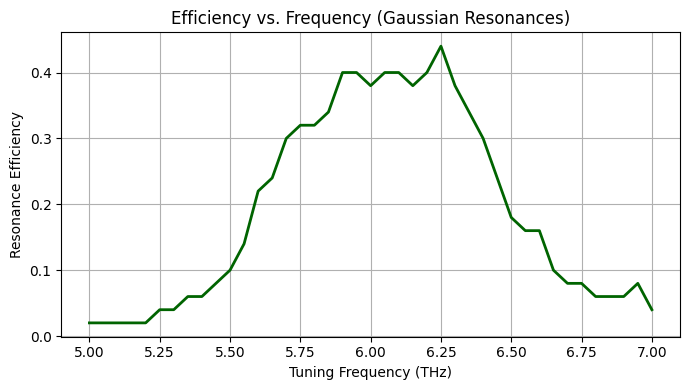

In [ ]:
# Efficiency vs. frequency with Gaussian-distributed resonances

def efficiency(freq):
    matched = np.abs(resonances - freq) < 0.2  # fixed tolerance
    return matched.sum() / n

frequency_values = np.arange(5.0, 7.05, 0.05)
efficiency_values = [efficiency(freq) for freq in frequency_values]

# Plot
plt.figure(figsize=(7, 4))
plt.plot(frequency_values, efficiency_values, color='darkgreen', linewidth=2)
plt.title("Efficiency vs. Frequency (Gaussian Resonances)")
plt.xlabel("Tuning Frequency (THz)")
plt.ylabel("Resonance Efficiency")
plt.grid(True)
plt.tight_layout()
plt.show()